# Digit recognition 

In [64]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tqdm import tqdm

## Model
### <u>Question 4.1 </u>

In [65]:
print('We are going to use (784+1) * 32 + (32+1) *32 + (32+1) *10 =',(784+1)*32+(32+1)*32+(32+1)*10,' optimization variables ')

We are going to use (784+1) * 32 + (32+1) *32 + (32+1) *10 = 26506  optimization variables 


5


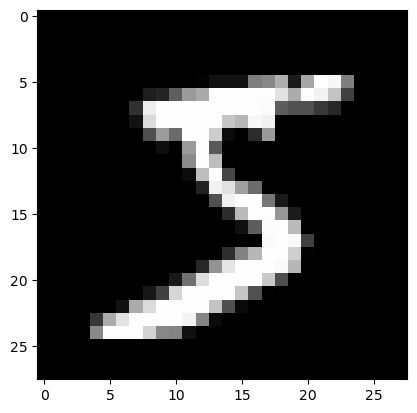

In [66]:
train_data, test_data = tf.keras.datasets.mnist.load_data(path="mnist.npz")
x_train = train_data[0].reshape(-1,784).astype(float) / 255
y_train = train_data[1]
print(y_train[0])
plt.imshow(train_data[0][0], cmap='gray')

In [67]:
# source: https://keras.io/guides/training_with_built_in_methods/

inputs = keras.Input(shape=(784,), name="digits")
x = layers.Dense(32, activation="relu", name="dense_1")(inputs)
x = layers.Dense(32, activation="relu", name="dense_2")(x)
outputs = layers.Dense(10, activation=None, name="predictions")(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
#def loss(true, pred):
#    val = 0.
#    for i in range(len(true)):
#        delta = pred[i, true[i]]
#        val -= np.log(delta)
#    return val / len(true)
model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 digits (InputLayer)         [(None, 784)]             0         
                                                                 
 dense_1 (Dense)             (None, 32)                25120     
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 predictions (Dense)         (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


In [68]:
# untrained model
logits = model(x_train)
np.argmax(logits, 1)[0:100]

array([9, 9, 8, 4, 9, 9, 0, 9, 9, 9, 9, 5, 8, 9, 8, 0, 9, 9, 8, 9, 9, 9,
       9, 1, 8, 8, 1, 9, 8, 2, 0, 9, 5, 9, 9, 9, 9, 9, 9, 8, 5, 9, 3, 9,
       1, 9, 8, 9, 8, 9, 9, 1, 9, 8, 9, 9, 9, 0, 0, 1, 8, 9, 8, 1, 9, 2,
       9, 8, 5, 9, 9, 9, 5, 9, 8, 9, 8, 8, 8, 9, 8, 9, 9, 5, 9, 8, 8, 9,
       6, 8, 8, 9, 9, 9, 9, 9, 3, 9, 9, 1])

In [69]:
# what we would like to get
y_train[0:100]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5,
       6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9,
       0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1], dtype=uint8)

## Stochastic gradient descent

### <u>Question 5.1 </u>

### Implement stochastic gradient descent

In [71]:
## Updating weights

def update_weights(model, update, gamma):
    new_weights = model.trainable_weights.copy()
    for i in range(len(new_weights)):
        new_weights[i] = new_weights[i] - gamma * update[i]
    model.set_weights(new_weights)   


number = len(x_train)//8   # K: Number of iteration over the data 
step = 1/np.sqrt(number)   # Constant step 
loss_ = []


for k in tqdm(range (number)):
    
    x_train_batch = x_train[8*k:8*k+8]
    y_train_batch = y_train[8*k:8*k+8]
    with tf.GradientTape() as tape:
            # Run the forward pass of the layer.
            # The operations that the layer applies
            # to its inputs are going to be recorded
            # on the GradientTape.
            logits = model(x_train_batch)  # Logits for this minibatch

            # Compute the loss value for this minibatch.
            loss_value = loss(y_train_batch, logits)

    # Use the gradient tape to automatically retrieve
    # the gradients of the trainable variables with respect to the loss.
    grad = tape.gradient(loss_value, model.trainable_weights)
    update_weights(model, grad, step)
    ## Evaluate model
    samples_for_evaluation = np.random.randint(0, 10000, 1000)
    logits = model(x_train[samples_for_evaluation])
    loss_.append(loss(y_train[samples_for_evaluation], logits).numpy())
    

100%|██████████████████████████████████████| 7500/7500 [00:50<00:00, 147.47it/s]


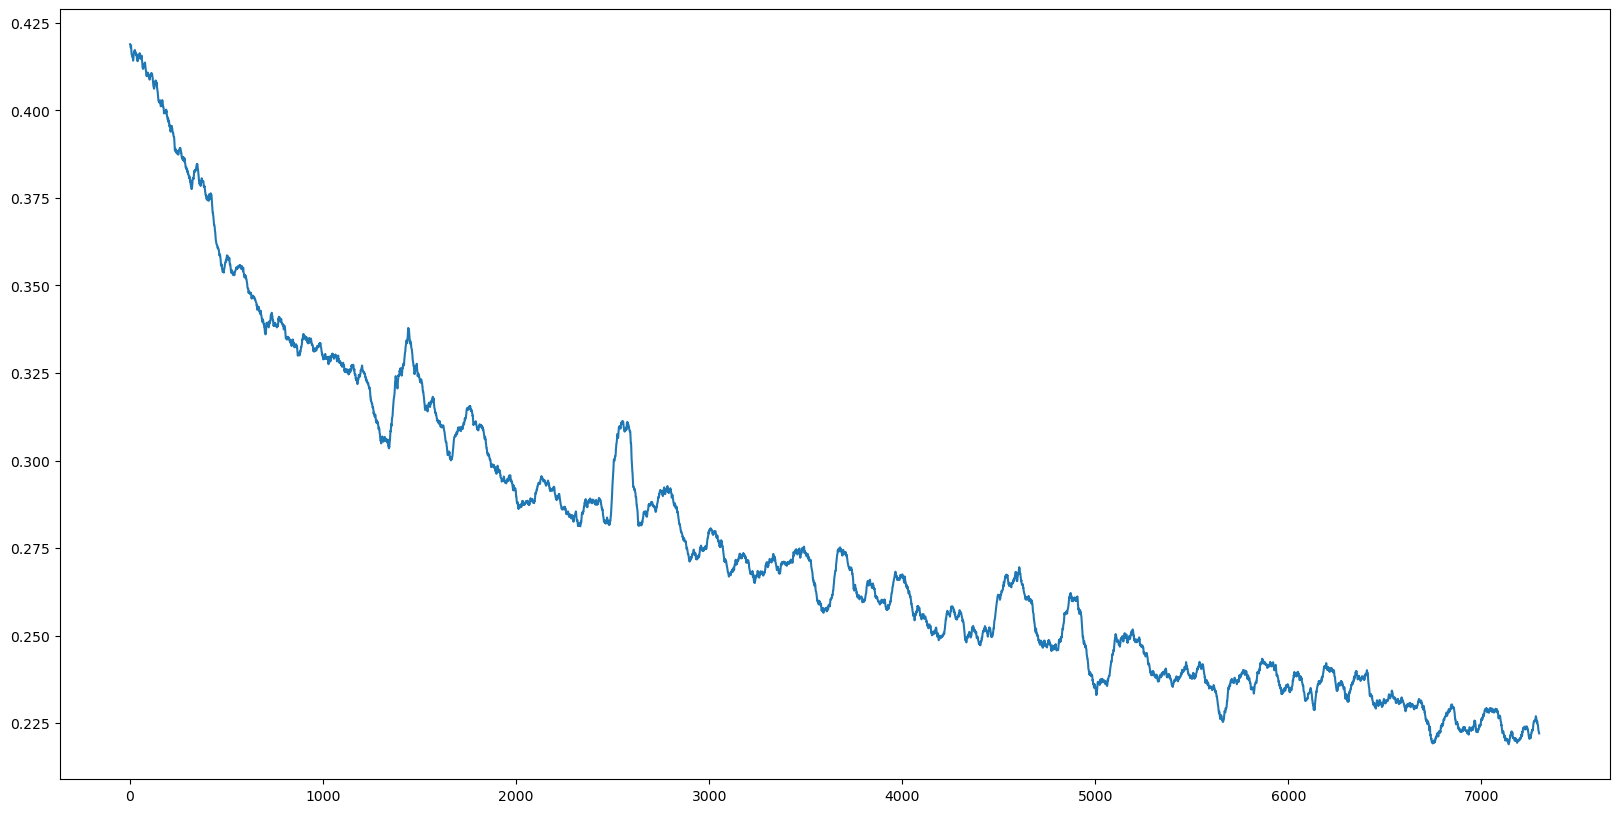

In [80]:
plt.figure(1,figsize=(20,10))
loss_lisse = [np.mean(loss_[k:k+100]) for k in range (len(loss_)-200)]
plt.plot(np.arange(len(loss_lisse)),loss_lisse)
plt.show()

In [81]:
predi = []
data = (model.predict(test_data[0].reshape(-1,784).astype(float) / 255)*10).astype('int')
for i in tqdm(range(len(test_data[0].reshape(-1,784)))):
    L = data[i]
    predi.append(np.where( L == np.max(L))[0][0])

313/313 [==============================] - 1s 3ms/step


100%|█████████████████████████████████| 10000/10000 [00:00<00:00, 250141.88it/s]
